In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
df = pd.read_csv('insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.shape

(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 600x600 with 0 Axes>

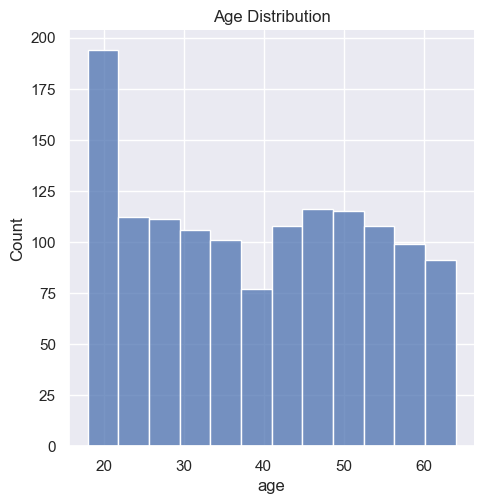

In [9]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(df['age'])
plt.title("Age Distribution")
plt.show()

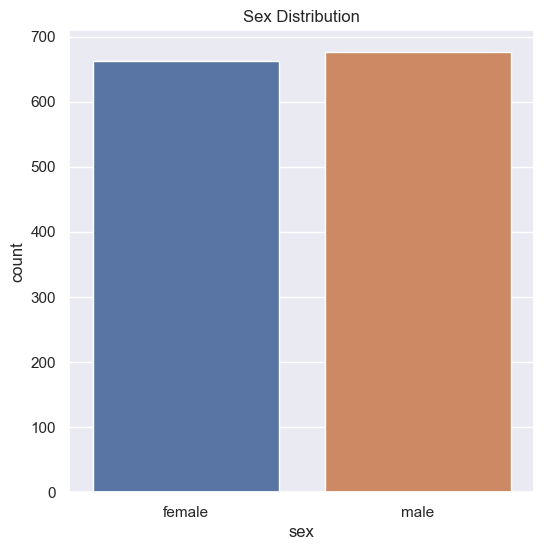

In [10]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=df)
plt.title("Sex Distribution")
plt.show()

In [11]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


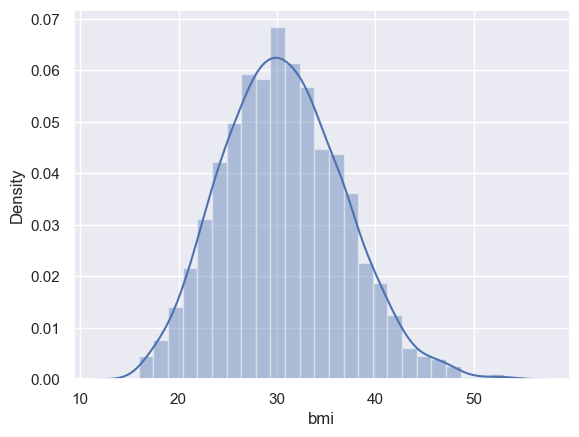

In [12]:
sns.distplot(df['bmi'])
plt.show()

In [13]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [14]:
df.replace({'sex':{'male':0,'female':1}},inplace=True)

In [15]:
df.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)

In [16]:
df.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)

In [18]:
x = df.drop(columns="charges",axis=1)
y= df['charges']

In [19]:
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [20]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [22]:
x_train.shape

(1070, 6)

In [23]:
x_test.shape

(268, 6)

In [24]:
reg = LinearRegression()

In [25]:
reg.fit(x_train,y_train)

LinearRegression()

In [26]:
training_data_prediction = reg.predict(x_train)

In [27]:
r2_train = metrics.r2_score(y_train, training_data_prediction)

In [28]:
r2_train

0.7741028169083207

In [29]:
test_data_prediction = reg.predict(x_test)

In [31]:
r2_test=metrics.r2_score(y_test, test_data_prediction)

In [32]:
r2_test

0.6486921910512615

In [33]:
sample_input_data =(30,1,22.7,0,1,0)

In [34]:
input_data_as_numpy_array = np.asarray(sample_input_data)

In [36]:
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [37]:
prediction = reg.predict(input_data_reshaped)

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [38]:
print("The insurance cose is", prediction)

The insurance cose is [2013.60011447]
